In [1]:
import os
import json
import numpy as np
import pandas as pd

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# use pandas to open dresses dataset
data  = os.path.join(os.getcwd(), "data", "dresses","dresses.xlsx")
dresses = pd.read_excel(data)
dresses = dresses.fillna("none")

mapping = {0: "don't recommend", 1: "recommend"}
dresses["Recommendation"] = dresses["Recommendation"].map(mapping)
dresses.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,none,chiffon,ruffles,animal,recommend
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,none,ruffles,animal,don't recommend
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,none,none,print,don't recommend
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,recommend
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,don't recommend


In [3]:
categorical_features = [
    "Price", "Size", "Season", "NeckLine", "SleeveLength", "waiseline",
    "Material", "FabricType", "Decoration", "Pattern Type"
]

In [4]:
dresses['description'] = dresses["Style"].str.cat(dresses[categorical_features], sep=' ')

In [5]:
dresses['description'] = dresses['description'].str.lower()

In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dresses['description'])
y = dresses["Recommendation"]

In [7]:
# Note on mahalanobis distance
# https://github.com/scikit-learn/scikit-learn/issues/11793

braycurtis


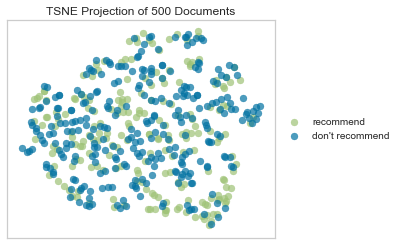

canberra


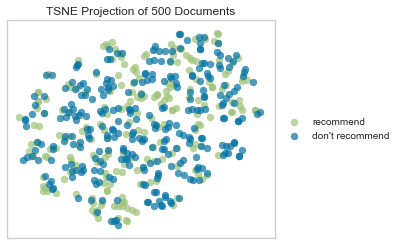

chebyshev


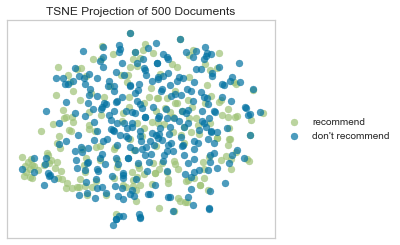

cityblock


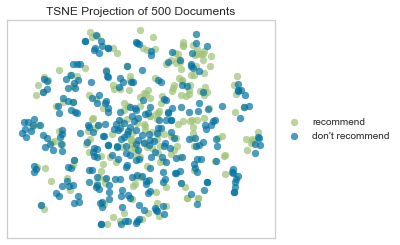

correlation


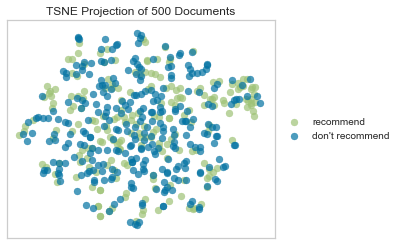

cosine


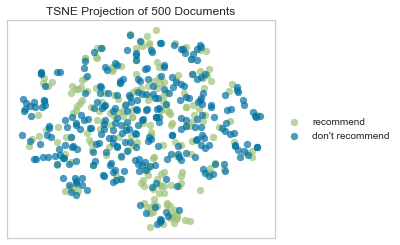

dice


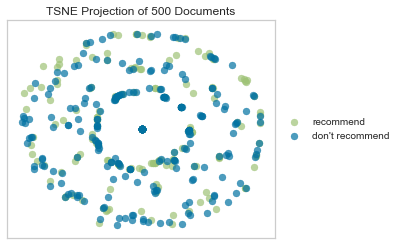

euclidean


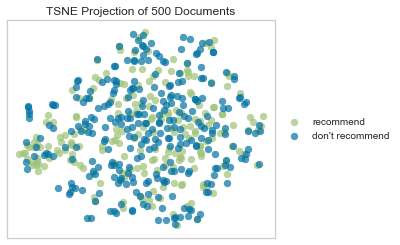

hamming


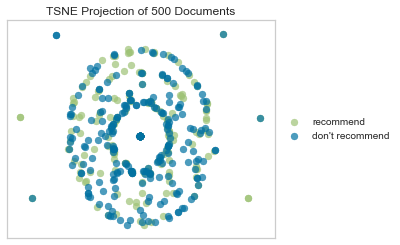

jaccard


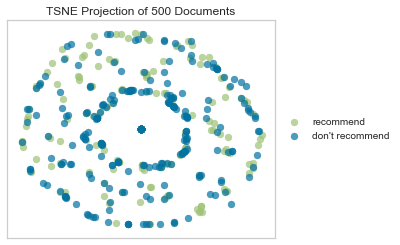

kulsinski


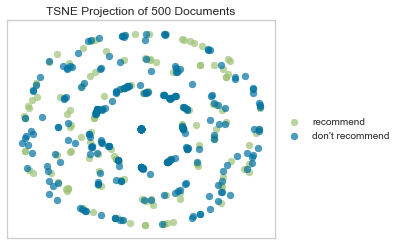

mahalanobis


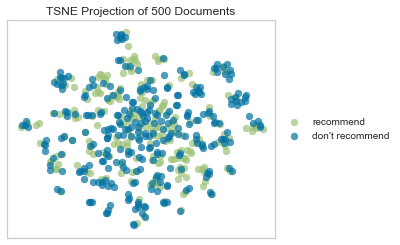

matching


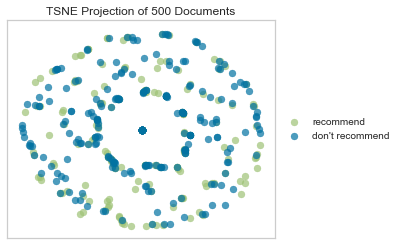

minkowski


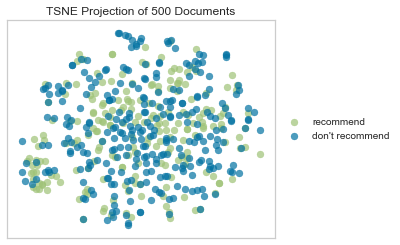

rogerstanimoto


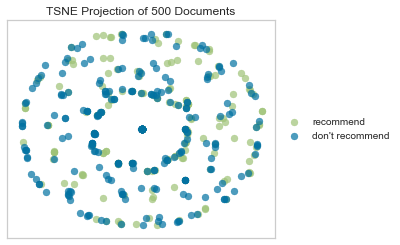

russellrao


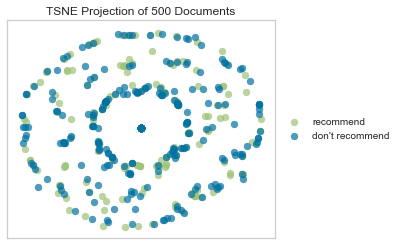

sokalmichener


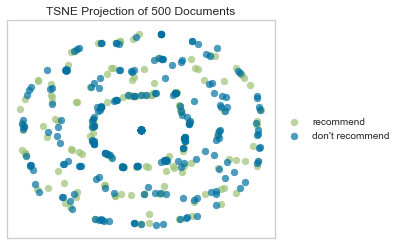

sokalsneath


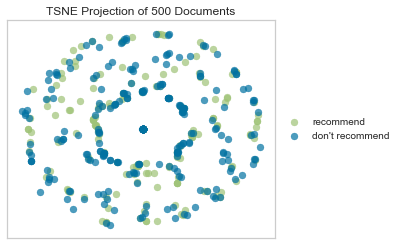

sqeuclidean


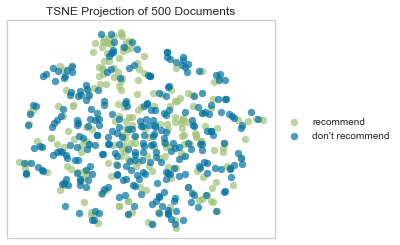

In [8]:
distance_functions = [
    "braycurtis", "canberra", "chebyshev", "cityblock", "correlation", "cosine",
    "dice", "euclidean", "hamming", "jaccard", "kulsinski", "mahalanobis",
    "matching", "minkowski", "rogerstanimoto", "russellrao",
    "sokalmichener", "sokalsneath", "sqeuclidean"
]

for metric in distance_functions:
    print(metric)
    if metric == "mahalanobis":
        tsne = TSNEVisualizer(metric=metric, method='exact')
    else: 
        tsne = TSNEVisualizer(metric=metric)
    tsne.fit(X, y)
    tsne.poof()

braycurtis


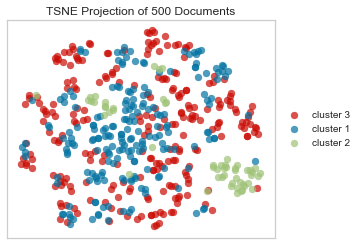

canberra


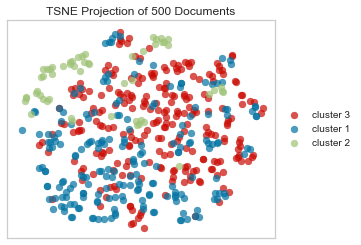

chebyshev


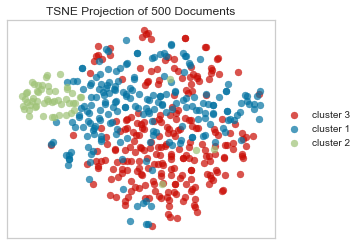

cityblock


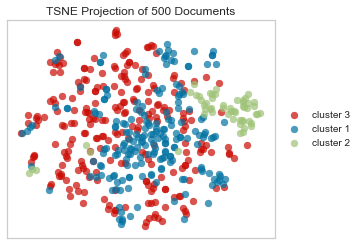

correlation


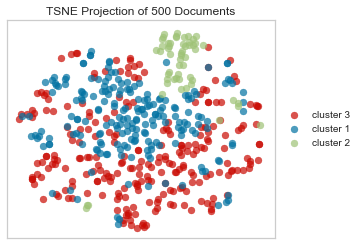

cosine


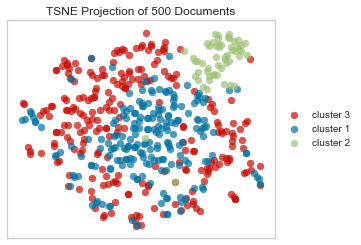

dice


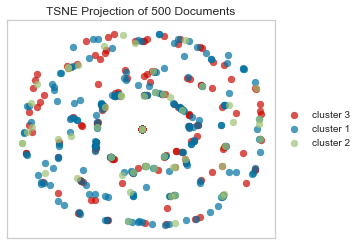

euclidean


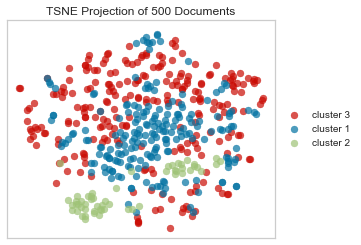

hamming


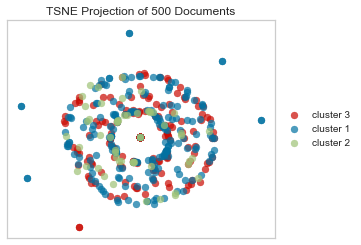

jaccard


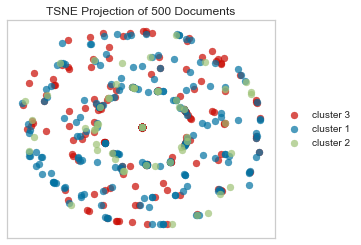

kulsinski


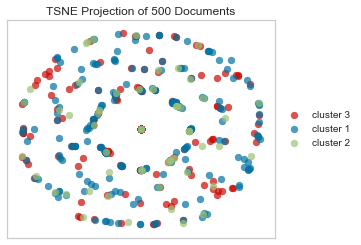

mahalanobis


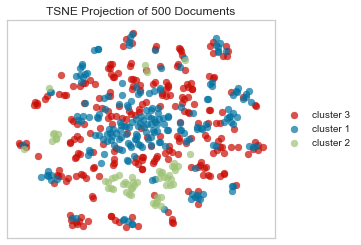

matching


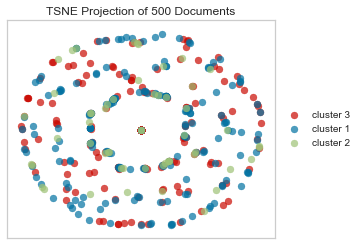

minkowski


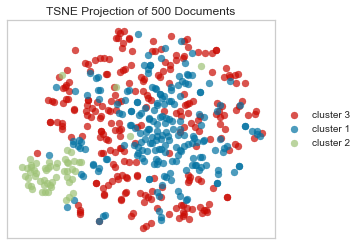

rogerstanimoto


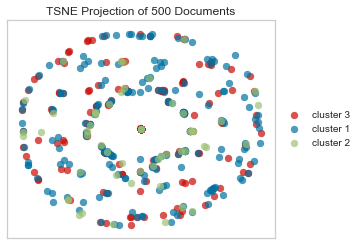

russellrao


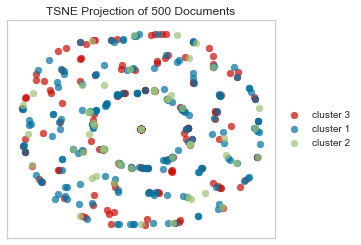

sokalmichener


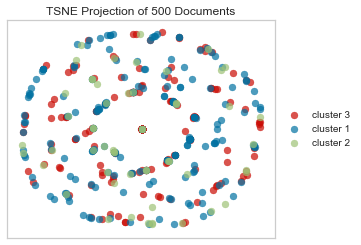

sokalsneath


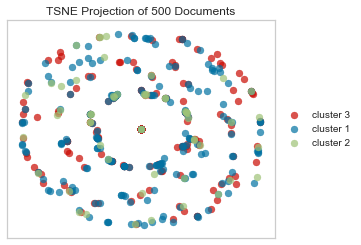

sqeuclidean


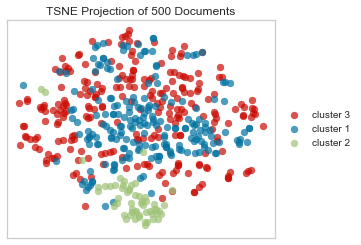

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist

clusters = KMeans(n_clusters=3)
clusters.fit(X)

for metric in distance_functions:
    print(metric)
    if metric == "mahalanobis":
        tsne = TSNEVisualizer(metric=metric, method='exact')
    else: 
        tsne = TSNEVisualizer(metric=metric)
    tsne.fit(X, ["cluster {}".format(c+1) for c in clusters.labels_])
    tsne.poof()